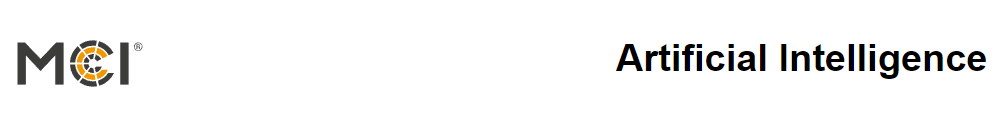

---
# 01 b Dataset Transformation

The curation of a dataset can have a high impact on the quality of a fit and the performance of a model. This is especially true for the generalization aspect. The distributions within the data are highly relevant to understand the limits of a model, which was trained with the given data. E.g. new data, that shows highly different distributions than the training data most likely will lead to a bad prediction/classification of the model.

As always we want to explain things with an example. Therefore we start with some data from kaggle. We take the heathcare dataset, that shows paitients with some personal data, the paitents conditions, billing information, etc.
The dataset is created synthetically.

As always we import the relevant packages and libraries

In [1]:
from scipy.io import loadmat # to be able to load .fig files from MATLAB
import os # to be able to operate on files and folders
import pandas as pd # we need this to be able to create pandas dataframes
import matplotlib.pyplot as plt # we need this to be able to plot data
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

Now we can load the data

In [3]:
df_hospital_csv = pd.read_csv("../Data/Hospital/healthcare_dataset.csv",delimiter=',')

The data shows various variables. Lets have a look at the data comprehension

In [4]:
df_hospital_csv.info()
df_hospital_csv.describe()

<class 'pandas.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  str    
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  str    
 3   Blood Type          55500 non-null  str    
 4   Medical Condition   55500 non-null  str    
 5   Date of Admission   55500 non-null  str    
 6   Doctor              55500 non-null  str    
 7   Hospital            55500 non-null  str    
 8   Insurance Provider  55500 non-null  str    
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  str    
 12  Discharge Date      55500 non-null  str    
 13  Medication          55500 non-null  str    
 14  Test Results        55500 non-null  str    
dtypes: float64(1), int64(2), str(12)
memory usage: 6.4 MB


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Include an outlier (if you want to)

In [5]:
# df_hospital_csv.loc[0, 'Age'] = 1400

According to the df.info() method there are currently only three numerical variables. Lets have a close look at them, by showing their distribution.

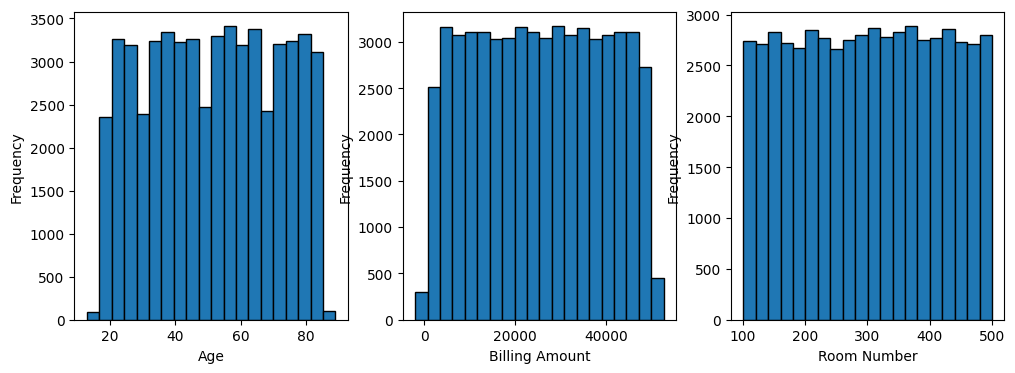

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df_hospital_csv['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df_hospital_csv['Billing Amount'], bins=20, edgecolor='black')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df_hospital_csv['Room Number'], bins=20, edgecolor='black')
plt.xlabel('Room Number')
plt.ylabel('Frequency')
plt.show()

#### TASK: The distribution are shown above. Would you expect such a distribution within a hospital?

# 1 Linear Transformers

For many algorithms in machine learning data has to follow certains rules. A common requirement is that the data comes from normal distributions. In an ideal case they follow a certain pattern. E.g. a mean of 0 with a standard deviation or variance of 1. It is also quite common to scale the data into the range 0 to 1. This is what we will try to do now.

In a first step we take the numerical variable from the dataframe so we can process them easily

In [7]:
df_hospital_numerical=df_hospital_csv[['Age','Billing Amount','Room Number']]
df_hospital_numerical.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Now we can check whether they follow a normal distribution. Commen tests would be Shapiro Wilk or KS-test

In [8]:
from scipy import stats



def is_normal_shapiro(data):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    return p


def is_normal_ks(data):
    stat, p = stats.kstest(data,stats.norm.cdf)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    return p


# Test for normality
print("Age normality test")
p_age = is_normal_ks(df_hospital_numerical['Age'])
print("\nBilling Amount normality test")
p_bill = is_normal_ks(df_hospital_numerical['Billing Amount'])
print("\nRoom Number normality test")
p_room = is_normal_ks(df_hospital_numerical['Room Number'])

randdist=np.random.randn(55000)
print("\nHow does the test work? normality test")
p_randdist = is_normal_ks(randdist)

Age normality test
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)

Billing Amount normality test
Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

Room Number normality test
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)

How does the test work? normality test
Statistics=0.006, p=0.064
Sample looks Gaussian (fail to reject H0)


As the tests say, the distributions are not normal (Gaussian).

Well, most estimators need them to be normal. What can we do about it? We can use a scaler from sklearn

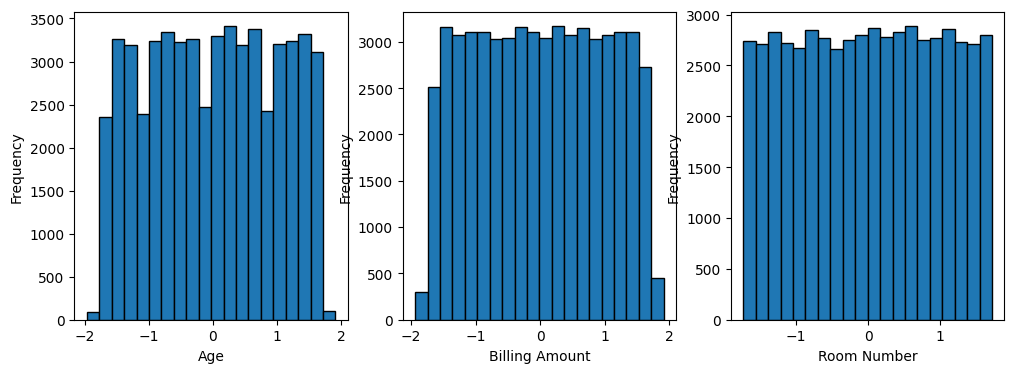

In [9]:
from sklearn import preprocessing

X_train = df_hospital_numerical

scaler = preprocessing.StandardScaler().fit(X_train)

scaler.mean_
scaler.scale_

X_train_scaled = scaler.transform(X_train)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(X_train_scaled[:,0], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(X_train_scaled[:,1], bins=20, edgecolor='black')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(X_train_scaled[:,2], bins=20, edgecolor='black')
plt.xlabel('Room Number')
plt.ylabel('Frequency')
plt.show()

The scaler did not change the shape of the distribution but scaled and shifted it to have a mean of 0 and a standard deviation of 1.

In [10]:
print('Xtrain scaled')
pd.DataFrame(X_train_scaled).describe()

Xtrain scaled


,0,1,2
count,5.550000e+04,5.550000e+04,5.550000e+04
mean,7.783964e-17,5.812368e-17,2.365915e-16
std,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.966071e+00,-1.938440e+00,-1.736648e+00
25%,-8.437519e-01,-8.653725e-01,-8.602315e-01
50%,2.349424e-02,-8.772730e-05,7.507427e-03
75%,8.397259e-01,8.641834e-01,8.665690e-01
max,1.911030e+00,1.915723e+00,1.725631e+00


This Scaling is reversible, therefor the shift and the scaling factors are of interest.

In [11]:
print('There are the shift values')
print(scaler.mean_)
print('There are the scale values')
print(scaler.scale_)

There are the shift values
[   51.53945946 25539.31609721   301.13482883]
There are the scale values
[   19.60227721 14211.32639917   115.24203047]


If you want the values to be within a range use the MinMaxScaler from sklearn. E.g. you can do it like shown below.

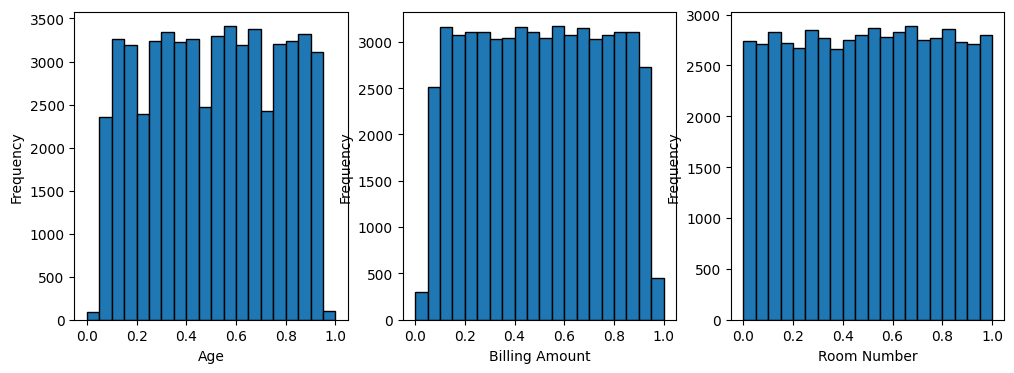

X_train_minmax


,0,1,2
count,55500.000000,55500.000000,55500.000000
mean,0.507098,0.502947,0.501591
std,0.257927,0.259462,0.288830
min,0.000000,0.000000,0.000000
25%,0.289474,0.278418,0.253133
50%,0.513158,0.502924,0.503759
75%,0.723684,0.727168,0.751880
max,1.000000,1.000000,1.000000


In [12]:
scaler_minmax = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(X_train_minmax[:,0], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(X_train_minmax[:,1], bins=20, edgecolor='black')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(X_train_minmax[:,2], bins=20, edgecolor='black')
plt.xlabel('Room Number')
plt.ylabel('Frequency')
plt.show()

print('X_train_minmax')
pd.DataFrame(X_train_minmax).describe()


We currently only have covered linear transformers. Especially linear transformers on data with no outliers.

#### TASK: What could we do if we have data with a lot of outliers? Would the methods we now know still work properly?

--> Check the robust scaler from sklearn if you have outliers in your data.

But what about the distributions? We still do not have a normal distribution. What can we do about that?

# 2 Nonlinear Transformers

The first nonlinear transformer is the power transformer.

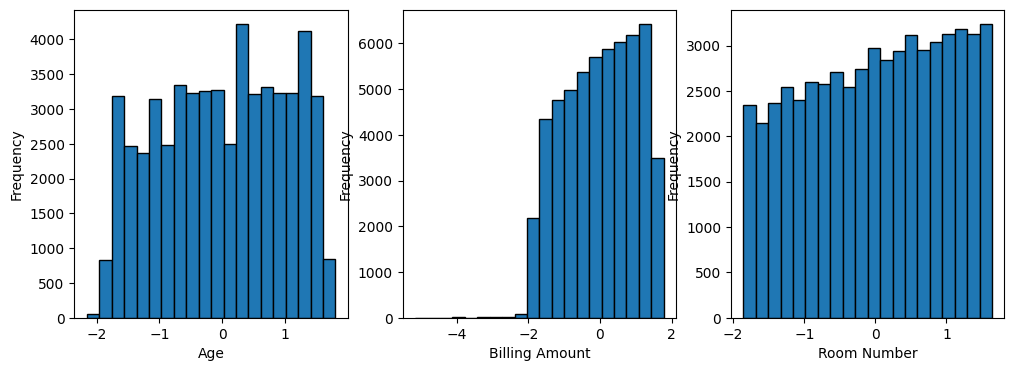

Age normality test after power transformation
Statistics=0.067, p=0.000
Sample does not look Gaussian (reject H0)

Billing Amount normality test after power transformation
Statistics=0.061, p=0.000
Sample does not look Gaussian (reject H0)

Room Number normality test after power transformation
Statistics=0.062, p=0.000
Sample does not look Gaussian (reject H0)
X_train_transformed


,0,1,2
count,5.550000e+04,5.550000e+04,5.550000e+04
mean,-2.693661e-16,1.024206e-18,-5.530711e-17
std,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.155540e+00,-5.160421e+00,-1.857567e+00
25%,-8.199470e-01,-8.227586e-01,-8.370031e-01
50%,7.050009e-02,6.056295e-02,5.538931e-02
75%,8.464282e-01,8.642174e-01,8.709487e-01
max,1.801824e+00,1.779004e+00,1.639513e+00


In [13]:
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransformer with Yeo-Johnson method (handles both positive and negative values)
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the data
X_train_transformed = pt.fit_transform(X_train)

# Plot the transformed data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(X_train_transformed[:, 0], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(X_train_transformed[:, 1], bins=20, edgecolor='black')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(X_train_transformed[:, 2], bins=20, edgecolor='black')
plt.xlabel('Room Number')
plt.ylabel('Frequency')
plt.show()

#Check for normality using KS test
print("Age normality test after power transformation")
p_age = is_normal_ks(X_train_transformed[:,0])
print("\nBilling Amount normality test after power transformation")
p_bill = is_normal_ks(X_train_transformed[:,1])
print("\nRoom Number normality test after power transformation")
p_room = is_normal_ks(X_train_transformed[:,2])

print('X_train_transformed')
pd.DataFrame(X_train_transformed).describe()


We can still see, that the distribution is NOT a normal one for the given case. This can be expected, as a power transformation is not optimal for transforming a unified distribution to a normal one ([Link](https://scikit-learn.org/stable/modules/preprocessing.html)). We can nearly enforce it with the Quantile Transformer.


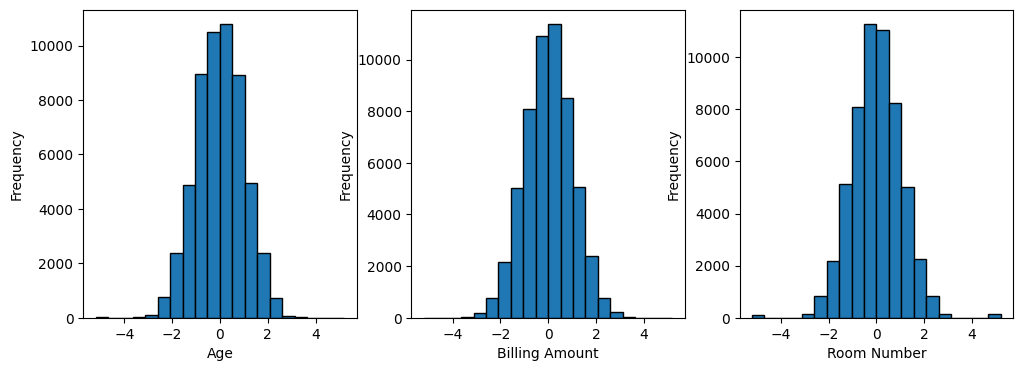

Age normality test after quantile transformation
Statistics=0.011, p=0.000
Sample does not look Gaussian (reject H0)

Billing Amount normality test after quantile transformation
Statistics=0.012, p=0.000
Sample does not look Gaussian (reject H0)

Room Number normality test after quantile transformation
Statistics=0.006, p=0.048
Sample does not look Gaussian (reject H0)
X_train_qt


,0,1,2
count,55500.000000,55500.000000,55500.000000
mean,-0.001295,0.017624,-0.002736
std,0.995332,0.995711,1.042414
min,-5.199338,-5.199338,-5.199338
25%,-0.654930,-0.660162,-0.665852
50%,0.010037,0.024946,-0.003764
75%,0.654930,0.685565,0.667419
max,5.199338,5.199338,5.199338


In [14]:
from sklearn.preprocessing import QuantileTransformer

# Initialize QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')

# Fit and transform the data
X_train_qt = qt.fit_transform(X_train)

# Plot the transformed data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(X_train_qt[:, 0], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(X_train_qt[:, 1], bins=20, edgecolor='black')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(X_train_qt[:, 2], bins=20, edgecolor='black')
plt.xlabel('Room Number')
plt.ylabel('Frequency')
plt.show()

#Check for normality using KS test
print("Age normality test after quantile transformation")
p_age = is_normal_ks(X_train_qt[:,0])
print("\nBilling Amount normality test after quantile transformation")
p_bill = is_normal_ks(X_train_qt[:,1])
print("\nRoom Number normality test after quantile transformation")
p_room = is_normal_ks(X_train_qt[:,2])

print('X_train_qt')
pd.DataFrame(X_train_qt).describe()


With the power transformer we can nearly transform all the variables to become normally distributed (Gaussian).

## 3 Encoding

Within the original data we have also data that is non numeric. Most of the time this data follows a specific logic. E.g. it is binary or categorical. We can check the data ones more how it is comprised

In [15]:
df_hospital_csv.info()

<class 'pandas.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  str    
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  str    
 3   Blood Type          55500 non-null  str    
 4   Medical Condition   55500 non-null  str    
 5   Date of Admission   55500 non-null  str    
 6   Doctor              55500 non-null  str    
 7   Hospital            55500 non-null  str    
 8   Insurance Provider  55500 non-null  str    
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  str    
 12  Discharge Date      55500 non-null  str    
 13  Medication          55500 non-null  str    
 14  Test Results        55500 non-null  str    
dtypes: float64(1), int64(2), str(12)
memory usage: 6.4 MB


Variables such as blood type, gender or doctor most likely will be either binary or categorical.

In [16]:
df_hospital_csv.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Data that are given as strings can be transferred to categories by encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

le.fit(df_hospital_csv['Blood Type'])
df_hospital_csv['Blood Type Numerical'] = le.transform(df_hospital_csv['Blood Type'])

print(df_hospital_csv.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

For several tasks it is reasonable to encode the data in given formats. Catergories sometimes need to be presented in one hot encoding. For the blood type this might end as shown below

[[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


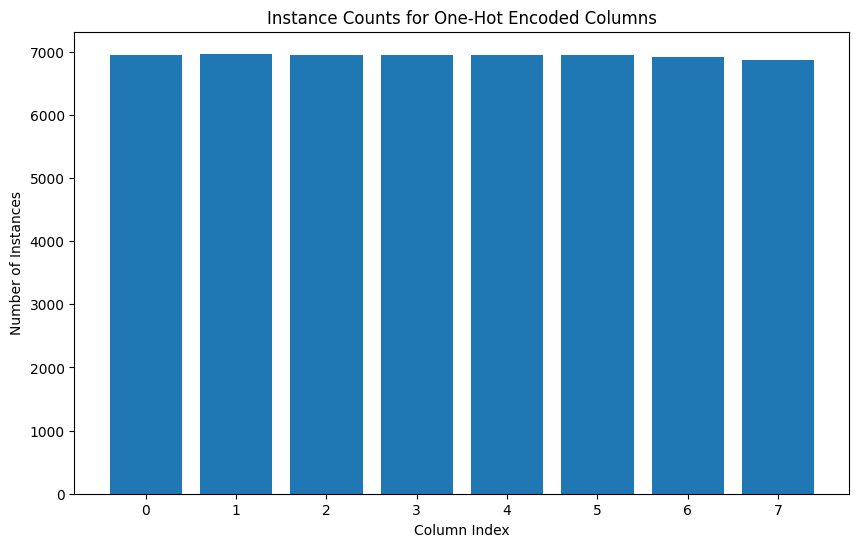

In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_hospital_csv[['Blood Type Numerical']])

onehotlabels = enc.transform(df_hospital_csv[['Blood Type Numerical']]).toarray()
print(onehotlabels)

# Count the occurrences of each column
column_counts = np.sum(onehotlabels, axis=0)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(column_counts)), column_counts)
plt.xlabel("Column Index")
plt.ylabel("Number of Instances")
plt.title("Instance Counts for One-Hot Encoded Columns")
plt.show()
